# Lecture 6

### REGRESSION IS ALL THE SAME - it's the regularization that makes it different

### Notes

- We want to use convex regularization so we can have a convex problem (convex problems are easier to solve)
    - This includes L1, L2, L3.... Linf
    - L0, L1/2 are not convex

- We want large variance on our input data
- we can use PCA to create components with large variance
    - watch out - this component could become un-correlated with y (leading to a poor predictor)

### Partial Least Squares

- This is an algorithm that maximizes the correlation to y of the projected feature z
- It constructs the projection such that it maximizes the correlation to y
- Basically principal component analysis with this maximizer added
- However - this doesn't mean it will out-perform PCA
    - Theoretically it should - but in practice often it doesnt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 5\ziptrain.csv"
zipdata = np.loadtxt(path)
zipdata.shape

(7291, 257)

In [3]:
path_test = r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 5\ziptest.csv"
zipdata_test = np.loadtxt(path_test)
zipdata_test.shape

(2007, 257)

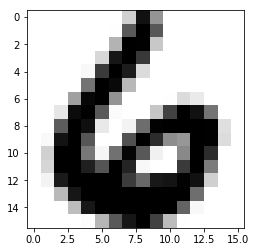

In [4]:
plt.imshow(-zipdata[0, 1:].reshape(16,16), 'gray')

In [5]:
X_train = zipdata[:, 1:]
y_train = zipdata[:, 0]

X_test = zipdata_test[:, 1:]
y_test = zipdata_test[:, 0]

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.predict(X_test))
print(y_test)

[9. 6. 3. ... 4. 0. 1.]
[9. 6. 3. ... 4. 0. 1.]


## We have so many parameters how do we visualize? Use PCA to visualize in 2D and determine if this classification problem looks do-able:

In [7]:
zipdata3 = zipdata[zipdata[:, 0] == 3]
zipdata8 = zipdata[zipdata[:, 0] == 8]
zipdata38 = np.vstack([zipdata3, zipdata8])

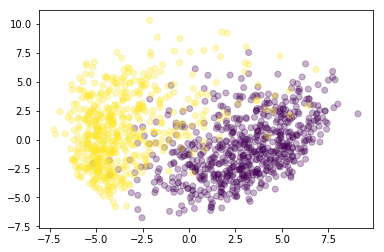

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(zipdata38[:, 1:])
Z = pca.transform(zipdata38[:, 1:])
plt.scatter(Z[:, 0], Z[:, 1], c=zipdata38[:, 0], alpha=0.3)

### From the above graph it seems that the data can be easily clustered/classified
A DNN would over-complicate the problem - this is a VERY easy classification problem

# Beyond Linearity

Less practical - more conceptual

### Topics:
- Splines
- Nearest Neighbours
- Local Regression

### Splines

### Nearest Neighbors

- Take the average value of y for the kth nearest neighbors

### Local Regression

- Fit local points to a regression smoothly